<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/05-2-Evaluacion-de-Modelos-Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Evaluación de modelos - Agrupamiento
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuadero está diseñado como una guía introductoria para la evaluación de modelos de agrupamiento (clustering). Se presentan los conceptos básicos de la evaluación de modelos de agrupamiento y se proporcionan ejemplos de cómo se pueden aplicar en Python.


Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para visualización
from scipy.spatial.distance import cdist # Para cálculo de distancias
# Modelo de clustering
from sklearn.cluster import KMeans
# Métricas de evaluación de clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

---
## <font color='264CC7'> Lectura de datos </font>


Utilicemos datos ficticios:

In [2]:
# Cargar datos
datos = pd.read_csv('https://raw.githubusercontent.com/CodigoMaquina/code/refs/heads/main/datos/propiedades.csv', header=None)
# Nombro las columnas
datos.columns = ['x', 'y']

# Mostrar los datos
display(datos.head())

,x,y
0,1.698042,6.194126
1,1.028309,10.013562
2,1.498665,17.396522
3,0.988410,23.138509
4,1.042310,23.670459


Graficamos los datos para tener una idea de cómo se ven.

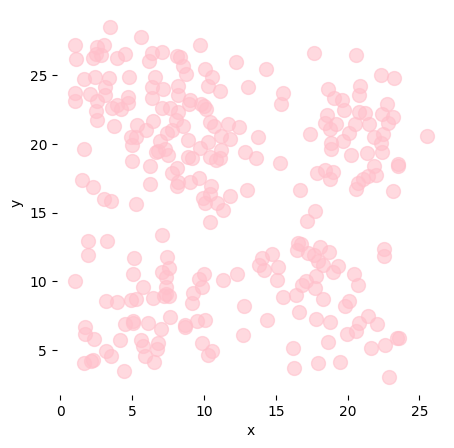

In [3]:
# Graficar datos
plt.figure(figsize=(5, 5))
plt.scatter(datos['x'], datos['y'], c="pink", s=100, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.box(False)
plt.show()

---
## <font color='264CC7'> Aplicación de modelo </font>

c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


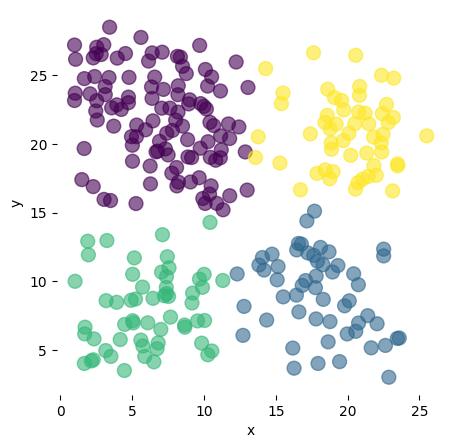

In [4]:
# Clusters con el algoritmo K-Means (K-medias) 
clusters = KMeans(n_clusters=4, random_state=1)
clusters.fit_predict(datos)

# Graficar clusters
plt.figure(figsize=(5, 5))
plt.scatter(datos['x'], datos['y'], c=clusters.labels_, s=100, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.box(False)
plt.show()


---
## <font color='264CC7'> Métricas de calidad por partición </font>

Diámetro de cada cluster:

In [5]:
# Diámetro de cada cluster
for i in range(4):
    cluster = datos[clusters.labels_ == i]
    print(f"Diámetro del cluster {i}: {cdist(cluster, cluster).max()}")


Diámetro del cluster 0: 15.977236625831296
Diámetro del cluster 1: 13.118523133144599
Diámetro del cluster 2: 13.473251179831427
Diámetro del cluster 3: 12.527734037550006


Separación entre clusters:

In [6]:
# Separación de clusters
for i in range(4):
    cluster1 = datos[clusters.labels_ == i]
    cluster2 = datos[clusters.labels_ != i]
    print(f"Separación del cluster {i}: {cdist(cluster1, cluster2).min()}")


Separación del cluster 0: 0.8200728591460648
Separación del cluster 1: 1.1065755098650079
Separación del cluster 2: 1.1065755098650079
Separación del cluster 3: 0.8200728591460648


---
## <font color='264CC7'> Métricas de calidad general </font>

**Índice Dunn**

El índice Dunn es una métrica que evalúa la calidad de una partición de clusters considerando tanto la separación entre clusters como la cohesión dentro de los clusters. Se define como el cociente entre la distancia mínima entre clusters y el diámetro máximo de los clusters:
$$
D = \frac{\min_{i \neq j} d(C_i, C_j)}{\max_k diam(C_k)}.
$$

In [7]:
# Índice Dunn:
diametros = [cdist(datos[clusters.labels_ == i], datos[clusters.labels_ == i]).max() for i in range(4)]
separaciones = [cdist(datos[clusters.labels_ == i], datos[clusters.labels_ != i]).min() for i in range(4)]

DUNN = min(separaciones) / max(diametros)
print(f"Índice Dunn: {DUNN}")

Índice Dunn: 0.051327578000579084


**Silueta**

*Fórmula general:*
El coeficiente de silueta ($s(i)$) para un punto $i$ se calcula como:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))},
$$
donde:
- $a(i)$ es la distancia promedio entre el punto $i$ y todos los demás puntos en el mismo clúster (cohesión) $$a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, j \neq i} d(i, j),$$ donde $C_i$ es el clúster al que pertenece el punto $i$.
- $b(i)$ es la distancia promedio entre el punto $i$ y todos los puntos en el clúster más cercano al que no pertenece (separación) $$b(i) = \min_{C \neq C_i} \left( \frac{1}{|C|} \sum_{j \in C} d(i, j) \right),$$  donde la minimización se realiza sobre todos los clústeres $C$ diferentes de $C_i$.

*Promedio de silueta:*
El valor promedio del coeficiente de silueta para todos los puntos es un indicador general de la calidad del agrupamiento:

- $0.7 - 1.0$: Agrupamiento excelente.
- $0.5 - 0.7$: Agrupamiento razonable.
- $0.25 - 0.5$: Agrupamiento débil; posibles problemas de cohesión o separación.
- $0.0 - 0.25$: Clústeres poco definidos, posiblemente solapados.


In [8]:
# Silhouette
silhouette = silhouette_score(datos, clusters.labels_)
print(f"Silhouette: {silhouette}")

Silhouette: 0.52867195901453


**Davies-Bouldin**

El índice Davies-Bouldin (DB) mide la calidad de un modelo de agrupamiento evaluando la compacidad de los clústeres y su separación relativa. A diferencia del coeficiente de silueta, valores más bajos del índice DB indican un mejor agrupamiento.

*Fórmula general:*
El índice Davies-Bouldin para un conjunto de clústeres $k$ se calcula como:
$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{i,j}} \right)
$$

Donde:
- $s_i$: Dispersión del clúster $i$ (e.g., promedio de la distancia de los puntos de $i$ a su centroide).
- $d_{i,j}$: Distancia entre los centroides de los clústeres $i$ y $j$ (separación entre clústeres).
- La métrica considera el peor caso ($\max$) de la relación de dispersión y separación para cada par de clústeres.

*Interpretación*
1. Valores más bajos ($< 1$): Indican un agrupamiento compacto y bien separado. Los clústeres están definidos de manera clara.

2. Valores moderados ($1 - 2$): Agrupamiento razonable. Podría haber algo de superposición o poca compacidad.

3. Valores altos ($> 2$): Indican un agrupamiento pobre. Los clústeres están superpuestos o son demasiado difusos.

4. Valor $0$ (teórico): Ideal, pero prácticamente imposible. Indica una separación perfecta y una dispersión nula.


In [9]:
# Davies-Bouldin
davies_bouldin = davies_bouldin_score(datos, clusters.labels_)
print(f"Davies-Bouldin: {davies_bouldin}")

Davies-Bouldin: 0.5946694050634651
